


# Avaliação 3 – Professor Thomas. 
## Curso de Data Science – Skill Lab Brasil

### Grupo:

- Carlos
- Israel
- Lenilson
- Nara

Olá pessoal!

Este é o enunciado da Avaliação 3. Ela aborda o tema de Machine Learning não-Supervisionado: clusterização.

### O desafio:

Com o crescimento da disponibilidade de dados e mídias diversas, a decisão do que comprar, assistir ou consumir, entre tantas possibilidades, tornou-se cada vez mais difícil. Um sistema de recomendação (RecSys) oferece recomendações para o usuário, fazendo uma previsão de qual seria sua preferência. Isso traz benefícios para a empresa, que consegue otimizar seu serviço e promover o consumo de seu produto, e para o usuário, que gasta menos tempo com pesquisa e tem uma melhora na experiência. Os exemplos no mercado são diversos: a Amazon recomenda produtos do marketplace, a Netflix faz recomendação de Filmes, o Mendeley recomenda artigos ciêntíficos, a Globo.com recomenda notícias, o Spotify as músicas e o YouTube recomenda vídeos.

### O dataset:

O conjunto de dados que utilizaremos é o do Movielens, um site pertencente ao Grouplens que tem um sistema de avaliação de vários filmes.

No Movielens, é possível baixar um conjunto de dados contendo milhões de avaliações dos usuários, ou outras duas variações desse conjunto, contendo 27 milhões ou 100 mil avaliações. Usaremos essa última. 

Após baixarmos e descompactarmos o .ZIP disponibilizado no site, usaremos dois arquivos que nos interessam: movies.csv, que são as informações gerais do filme; e ratings.csv, que são diversas avaliações.

Link para download do dataset: https://grouplens.org/datasets/movielens/

Baixar o arquivo [ml-latest-small.zip](https://files.grouplens.org/datasets/movielens/ml-latest-small.zip), na seção "recommended for education and development".

### O que vocês devem fazer

Criar um Sistema de Recomendação para filmes, baseado em clusterização. A clusterização pode ser feita através de K-means ou Hierarchical Clustering. A interface de usuário deve ser feita de forma que o usuário possa inserir o id do filme que ele deseja assistir.

Etapas importantes:
- Juntar os dados dos arquivos movies.csv e ratings.csv
- Decidir quais features (colunas) serão utilizadas
- Realizar os pré-processamentos pertinentes para cada feature
- Criar o modelo de clusterização e decidir quantos clusters serão utilizados

Funcionamento da interface do usuário:
1. Inicialmente, um filme aleatório de cada cluster é apresentado, com seus respectivos ids.
2. O usuário insere o id do filme que ele deseja assistir
3. O programa faz então a recomendação, escolhendo aleatoriamente 5 filmes do mesmo cluster do filme inserido pelo usuário
4. Funcionalidade extra (não vale nota e não precisa ser implementada): permitir que o usuário diga se gostou ou não da recomendação. Se ele gostou, outros 5 filmes aleatórios do mesmo cluster devem ser recomendados. Se ele não gostou, voltar à etapa 1 (com outros filmes aleatórios, um por cluster).

### O que vocês devem entregar:

Um integrante de cada grupo deve entregar o arquivo com o código da solução em Python e os dados utilizados.

Não se esqueçam de incluir no arquivo de código os nomes dos integrantes do grupo.

### Critérios de avaliação:

**2 pontos:** Limpeza e pré-processamento dos dados

**2 pontos:** Visualização de dados 

**4 pontos:** Criação do modelo de clusterização

**2 pontos:** Interface de recomendação

**Total:** 10 pontos

### Entrega e apresentação:

As apresentações serão feitas na aula do dia 14/06. Cada grupo terá no máximo 15 minutos. É ideal que todos do grupo participem, e que apenas um integrante fique responsável pelo compartilhamento da tela.

A entrega será realizada no máximo até o mesmo dia, 14/06, até as 23h59.

**Bom trabalho a todos!**

## 1. Limpeza e Pré-processamento dos dados

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

In [44]:
# carregando os datasets nos dataframes
movies_df = pd.read_csv('data/movies.csv', index_col='movieId')
ratings_df = pd.read_csv('data/ratings.csv')

In [45]:
# mostrar os 5 primeiros - movies
movies_df.head()

title  \
movieId                                       
1                          Toy Story (1995)   
2                            Jumanji (1995)   
3                   Grumpier Old Men (1995)   
4                  Waiting to Exhale (1995)   
5        Father of the Bride Part II (1995)   

                                              genres  
movieId                                               
1        Adventure|Animation|Children|Comedy|Fantasy  
2                         Adventure|Children|Fantasy  
3                                     Comedy|Romance  
4                               Comedy|Drama|Romance  
5                                             Comedy

In [46]:
# mostrar os 5 primeiros - ratings
ratings_df.head()

userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931

In [47]:
# Checar o shape - movies
movies_df.shape

(9742, 2)

In [48]:
# Checar o shape - ratings
ratings_df.shape

(100836, 4)

In [49]:
# types das colunas - movies
movies_df.dtypes

title     object
genres    object
dtype: object

In [50]:
# types das colunas - ratings
ratings_df.dtypes

userId         int64
movieId        int64
rating       float64
timestamp      int64
dtype: object

In [51]:
# verificar valores nulos - movies
movies_df.isnull().sum()

title     0
genres    0
dtype: int64

In [52]:
# verificar valores nulos - ratings
ratings_df.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

### 1.1 Extraindo o ano do título do filme:

In [53]:
import re # Regex

def extract_year(title):
    try: ## Some titles do not have the year
        matcher = re.compile('\(\d{4}\)')  ## Need to extract '(year)' from the title in case there is a year in the title
        parenthesis_year = matcher.search(title).group(0)
        matcher = re.compile('\d{4}') ## Matching the year from the already matched '(year)'
        year = matcher.search(parenthesis_year).group(0)

        return int(year)
    except Exception:
        return 0

In [54]:
movies_df['year'] = movies_df['title'].apply(extract_year)
movies_df.head()

title  \
movieId                                       
1                          Toy Story (1995)   
2                            Jumanji (1995)   
3                   Grumpier Old Men (1995)   
4                  Waiting to Exhale (1995)   
5        Father of the Bride Part II (1995)   

                                              genres  year  
movieId                                                     
1        Adventure|Animation|Children|Comedy|Fantasy  1995  
2                         Adventure|Children|Fantasy  1995  
3                                     Comedy|Romance  1995  
4                               Comedy|Drama|Romance  1995  
5                                             Comedy  1995

### 1.2 Transformando o campo gênero em uma lista de strings

In [55]:
movies_df['genres_list'] = movies_df['genres'].apply(lambda genres: genres.split('|'))
movies_df.head()

title  \
movieId                                       
1                          Toy Story (1995)   
2                            Jumanji (1995)   
3                   Grumpier Old Men (1995)   
4                  Waiting to Exhale (1995)   
5        Father of the Bride Part II (1995)   

                                              genres  year  \
movieId                                                      
1        Adventure|Animation|Children|Comedy|Fantasy  1995   
2                         Adventure|Children|Fantasy  1995   
3                                     Comedy|Romance  1995   
4                               Comedy|Drama|Romance  1995   
5                                             Comedy  1995   

                                               genres_list  
movieId                                                     
1        [Adventure, Animation, Children, Comedy, Fantasy]  
2                           [Adventure, Children, Fantasy]  
3                                        [Comedy, Romance]  
4                                 [Comedy, Drama, Romance]  
5                                                 [Comedy]

In [56]:
# Análise dos diferente generos
def genres_analisys():
    genres_list = []
    for index, row in movies_df.iterrows():
        try:
            genres = row.genres_list
            genres_list.extend(genres)
        except:
            genres_list.append(row.genres)

    genres_list = list(set(genres_list))
    print(genres_list)
    
genres_analisys()

['War', '(no genres listed)', 'Thriller', 'Adventure', 'Fantasy', 'Children', 'Action', 'Western', 'IMAX', 'Documentary', 'Crime', 'Romance', 'Musical', 'Mystery', 'Film-Noir', 'Animation', 'Comedy', 'Drama', 'Horror', 'Sci-Fi']


In [57]:
# Melhorias referentes aos generos
def improve_genres(genres_list):
    if 'IMAX' in genres_list:
        genres_list.remove('IMAX') # removendo IMAX (não é genero, mas sim um tipo de formato de visualização)
    if '(no genres listed)' in genres_list:
        genres_list.remove('(no genres listed)') # trocando por None (mais simples)
        genres_list.append('None')
    return genres_list

movies_df['genres_list'] = movies_df['genres_list'].map(lambda x: improve_genres(x))

genres_analisys()

['War', 'Thriller', 'None', 'Adventure', 'Fantasy', 'Children', 'Action', 'Western', 'Documentary', 'Crime', 'Romance', 'Musical', 'Mystery', 'Film-Noir', 'Animation', 'Comedy', 'Drama', 'Horror', 'Sci-Fi']


### 1.3 Juntando os dados refentes as duas tabelas

In [58]:
# Através do pivot obtemos Users X Movies dataframe
ratings_title = pd.merge(ratings_df, movies_df, on='movieId' )
user_movie_ratings = pd.pivot_table(ratings_title, index='userId', columns= 'movieId', values='rating')

# Transpomos o dataset para obtermos o Movies X Users dataframe
# Assim obtemos a recomendação a nível de usuário
movie_user_ratings = user_movie_ratings.T
print('dataset dimensions: ', movie_user_ratings.shape, '\n\nSubset example:')
movie_user_ratings.iloc[:6, :10]

dataset dimensions:  (9724, 610) 

Subset example:


userId    1   2   3   4    5    6    7    8   9   10
movieId                                             
1        4.0 NaN NaN NaN  4.0  NaN  4.5  NaN NaN NaN
2        NaN NaN NaN NaN  NaN  4.0  NaN  4.0 NaN NaN
3        4.0 NaN NaN NaN  NaN  5.0  NaN  NaN NaN NaN
4        NaN NaN NaN NaN  NaN  3.0  NaN  NaN NaN NaN
5        NaN NaN NaN NaN  NaN  5.0  NaN  NaN NaN NaN
6        4.0 NaN NaN NaN  NaN  4.0  NaN  NaN NaN NaN

In [59]:
# Calculando o average rating de cada filme
avg_rating = movie_user_ratings.apply(np.nanmean, axis = 1)

movies_df.insert(2, 'avg_rating', round(avg_rating, 2))
movies_df.head()

title  \
movieId                                       
1                          Toy Story (1995)   
2                            Jumanji (1995)   
3                   Grumpier Old Men (1995)   
4                  Waiting to Exhale (1995)   
5        Father of the Bride Part II (1995)   

                                              genres  avg_rating  year  \
movieId                                                                  
1        Adventure|Animation|Children|Comedy|Fantasy        3.92  1995   
2                         Adventure|Children|Fantasy        3.43  1995   
3                                     Comedy|Romance        3.26  1995   
4                               Comedy|Drama|Romance        2.36  1995   
5                                             Comedy        3.07  1995   

                                               genres_list  
movieId                                                     
1        [Adventure, Animation, Children, Comedy, Fantasy]  
2                           [Adventure, Children, Fantasy]  
3                                        [Comedy, Romance]  
4                                 [Comedy, Drama, Romance]  
5                                                 [Comedy]

In [60]:
# Preenchendo o dataframe Movie X Users com 0
movie_user_ratings.fillna(0, inplace=True)
print('dataset dimensions: ', movie_user_ratings.shape, '\n\nSubset example:')
movie_user_ratings.iloc[:10, :15]

dataset dimensions:  (9724, 610) 

Subset example:


userId    1    2    3    4    5    6    7    8    9    10   11   12   13   14  \
movieId                                                                         
1        4.0  0.0  0.0  0.0  4.0  0.0  4.5  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2        0.0  0.0  0.0  0.0  0.0  4.0  0.0  4.0  0.0  0.0  0.0  0.0  0.0  0.0   
3        4.0  0.0  0.0  0.0  0.0  5.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4        0.0  0.0  0.0  0.0  0.0  3.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  3.0   
5        0.0  0.0  0.0  0.0  0.0  5.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
6        4.0  0.0  0.0  0.0  0.0  4.0  0.0  0.0  0.0  0.0  5.0  0.0  0.0  0.0   
7        0.0  0.0  0.0  0.0  0.0  4.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  3.0   
8        0.0  0.0  0.0  0.0  0.0  3.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
9        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
10       0.0  0.0  0.0  0.0  0.0  3.0  0.0  2.0  0.0  0.0  3.0  0.0  0.0  0.0   

userId    15  
movieId       
1        2.5  
2        0.0  
3        0.0  
4        0.0  
5        0.0  
6        0.0  
7        0.0  
8        0.0  
9        0.0  
10       0.0

In [61]:
# Mudando o valor da nota por 'Gostei'(1) ou 'Não gostei'(0)
movie_user_like = movie_user_ratings.applymap(lambda x:1 if x >= 3 else 0)
print('dataset dimensions: ', movie_user_like.shape, '\n\nSubset example:')
movie_user_like.iloc[:10, :15]

dataset dimensions:  (9724, 610) 

Subset example:


userId   1   2   3   4   5   6   7   8   9   10  11  12  13  14  15
movieId                                                            
1         1   0   0   0   1   0   1   0   0   0   0   0   0   0   0
2         0   0   0   0   0   1   0   1   0   0   0   0   0   0   0
3         1   0   0   0   0   1   0   0   0   0   0   0   0   0   0
4         0   0   0   0   0   1   0   0   0   0   0   0   0   1   0
5         0   0   0   0   0   1   0   0   0   0   0   0   0   0   0
6         1   0   0   0   0   1   0   0   0   0   1   0   0   0   0
7         0   0   0   0   0   1   0   0   0   0   0   0   0   1   0
8         0   0   0   0   0   1   0   0   0   0   0   0   0   0   0
9         0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
10        0   0   0   0   0   1   0   0   0   0   1   0   0   0   0

In [62]:
# Analisando a quantidade de recomendações de cada filme
rec_users = movie_user_like.apply(np.sum, axis = 1)

movie_user_like.insert(0, 'rec_count', rec_users)
print('dataset dimensions: ', movie_user_like.shape, '\n\nSubset example:')
movie_user_like.iloc[:10, :15]

dataset dimensions:  (9724, 611) 

Subset example:


userId   rec_count  1  2  3  4  5  6  7  8  9  10  11  12  13  14
movieId                                                          
1              199  1  0  0  0  1  0  1  0  0   0   0   0   0   0
2               89  0  0  0  0  0  1  0  1  0   0   0   0   0   0
3               43  1  0  0  0  0  1  0  0  0   0   0   0   0   0
4                4  0  0  0  0  0  1  0  0  0   0   0   0   0   1
5               38  0  0  0  0  0  1  0  0  0   0   0   0   0   0
6               99  1  0  0  0  0  1  0  0  0   0   1   0   0   0
7               44  0  0  0  0  0  1  0  0  0   0   0   0   0   1
8                6  0  0  0  0  0  1  0  0  0   0   0   0   0   0
9               12  0  0  0  0  0  0  0  0  0   0   0   0   0   0
10             118  0  0  0  0  0  1  0  0  0   0   1   0   0   0

In [63]:
# Considerando filmes com no minímo 3 recomendações 
movie_user_like_rec = movie_user_like.drop(movie_user_like[movie_user_like.rec_count < 3].index)
movie_user_like_rec.drop('rec_count', axis=1, inplace=True)
print('dataset dimensions: ', movie_user_like_rec.shape, '\n\nSubset example:')
movie_user_like_rec.iloc[:10, :15]

dataset dimensions:  (4154, 610) 

Subset example:


userId   1   2   3   4   5   6   7   8   9   10  11  12  13  14  15
movieId                                                            
1         1   0   0   0   1   0   1   0   0   0   0   0   0   0   0
2         0   0   0   0   0   1   0   1   0   0   0   0   0   0   0
3         1   0   0   0   0   1   0   0   0   0   0   0   0   0   0
4         0   0   0   0   0   1   0   0   0   0   0   0   0   1   0
5         0   0   0   0   0   1   0   0   0   0   0   0   0   0   0
6         1   0   0   0   0   1   0   0   0   0   1   0   0   0   0
7         0   0   0   0   0   1   0   0   0   0   0   0   0   1   0
8         0   0   0   0   0   1   0   0   0   0   0   0   0   0   0
9         0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
10        0   0   0   0   0   1   0   0   0   0   1   0   0   0   0

## 2. Visualização dos dados

In [64]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist

In [65]:
distortions = []
inertias = []
mappings1 = {}
mappings2 = {}
K = range(1, 20)

In [66]:
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(movie_user_like_rec)
    distortions.append(sum(np.min(
        cdist(movie_user_like_rec, kmeans.cluster_centers_), axis=1))/movie_user_like_rec.shape[0])
    inertias.append(kmeans.inertia_)
    mappings1[k] = sum(np.min(
        cdist(movie_user_like_rec, kmeans.cluster_centers_), axis=1))/movie_user_like_rec.shape[0]
    mappings2[k] = kmeans.inertia_

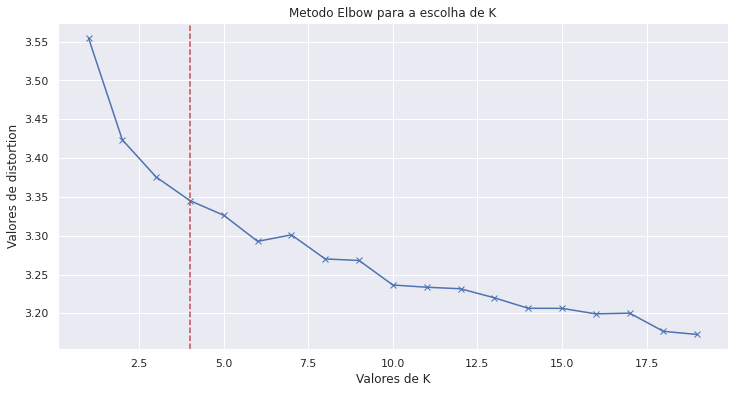

In [70]:
plt.figure(figsize=(12, 6))
plt.plot(K, distortions, 'bx-')
plt.axvline(x=4, color='r', linestyle='--')
plt.xlabel('Valores de K')
plt.ylabel('Valores de distortion')
plt.title('Metodo Elbow para a escolha de K');

Baseado no método elbow, escolhemos o número de clusters sendo igual a 4.

In [71]:
# Criação dos clusters
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4)
kmeans.fit(movie_user_like_rec)

KMeans(n_clusters=4)

In [72]:
y_predict = kmeans.labels_
y_predict

array([0, 0, 3, ..., 1, 1, 1], dtype=int32)

In [73]:
movie_user_like_rec.insert(0, 'cluster_labels', y_predict)
print('dataset dimensions: ', movie_user_like_rec.shape, '\n\nSubset example:')
movie_user_like_rec.iloc[:10, :15]

dataset dimensions:  (4154, 611) 

Subset example:


userId   cluster_labels  1  2  3  4  5  6  7  8  9  10  11  12  13  14
movieId                                                               
1                     0  1  0  0  0  1  0  1  0  0   0   0   0   0   0
2                     0  0  0  0  0  0  1  0  1  0   0   0   0   0   0
3                     3  1  0  0  0  0  1  0  0  0   0   0   0   0   0
4                     1  0  0  0  0  0  1  0  0  0   0   0   0   0   1
5                     1  0  0  0  0  0  1  0  0  0   0   0   0   0   0
6                     0  1  0  0  0  0  1  0  0  0   0   1   0   0   0
7                     3  0  0  0  0  0  1  0  0  0   0   0   0   0   1
8                     1  0  0  0  0  0  1  0  0  0   0   0   0   0   0
9                     1  0  0  0  0  0  0  0  0  0   0   0   0   0   0
10                    0  0  0  0  0  0  1  0  0  0   0   1   0   0   0

In [74]:
# Criando o dataframe final com as cluster_labels
cluster_movies_df = pd.merge(movies_df, movie_user_like_rec['cluster_labels'], 
                            on='movieId', how='inner')

cluster_movies_df.head(20)

title  \
movieId                                          
1                             Toy Story (1995)   
2                               Jumanji (1995)   
3                      Grumpier Old Men (1995)   
4                     Waiting to Exhale (1995)   
5           Father of the Bride Part II (1995)   
6                                  Heat (1995)   
7                               Sabrina (1995)   
8                          Tom and Huck (1995)   
9                          Sudden Death (1995)   
10                            GoldenEye (1995)   
11              American President, The (1995)   
12          Dracula: Dead and Loving It (1995)   
13                                Balto (1995)   
14                                Nixon (1995)   
15                     Cutthroat Island (1995)   
16                               Casino (1995)   
17                Sense and Sensibility (1995)   
18                           Four Rooms (1995)   
19       Ace Ventura: When Nature Calls (1995)   
20                          Money Train (1995)   

                                              genres  avg_rating  year  \
movieId                                                                  
1        Adventure|Animation|Children|Comedy|Fantasy        3.92  1995   
2                         Adventure|Children|Fantasy        3.43  1995   
3                                     Comedy|Romance        3.26  1995   
4                               Comedy|Drama|Romance        2.36  1995   
5                                             Comedy        3.07  1995   
6                              Action|Crime|Thriller        3.95  1995   
7                                     Comedy|Romance        3.19  1995   
8                                 Adventure|Children        2.88  1995   
9                                             Action        3.12  1995   
10                         Action|Adventure|Thriller        3.50  1995   
11                              Comedy|Drama|Romance        3.67  1995   
12                                     Comedy|Horror        2.42  1995   
13                      Adventure|Animation|Children        3.12  1995   
14                                             Drama        3.83  1995   
15                          Action|Adventure|Romance        3.00  1995   
16                                       Crime|Drama        3.93  1995   
17                                     Drama|Romance        3.78  1995   
18                                            Comedy        3.70  1995   
19                                            Comedy        2.73  1995   
20                Action|Comedy|Crime|Drama|Thriller        2.50  1995   

                                               genres_list  cluster_labels  
movieId                                                                     
1        [Adventure, Animation, Children, Comedy, Fantasy]               0  
2                           [Adventure, Children, Fantasy]               0  
3                                        [Comedy, Romance]               3  
4                                 [Comedy, Drama, Romance]               1  
5                                                 [Comedy]               1  
6                                [Action, Crime, Thriller]               0  
7                                        [Comedy, Romance]               3  
8                                    [Adventure, Children]               1  
9                                                 [Action]               1  
10                           [Action, Adventure, Thriller]               0  
11                                [Comedy, Drama, Romance]               3  
12                                        [Comedy, Horror]               1  
13                        [Adventure, Animation, Children]               1  
14                                                 [Drama]               1  
15                            [Action, Adventure, Romance]               1  
16

In [75]:
# Dataframe Movie X Cluster
movie_cluster = cluster_movies_df[['cluster_labels']]
movie_cluster.head()

cluster_labels
movieId                
1                     0
2                     0
3                     3
4                     1
5                     1

### Criando um dataframe pra cada cluster

In [76]:
# Cluster 0
cluster_movies_0 = cluster_movies_df[cluster_movies_df['cluster_labels'] == 0]
cluster_movies_0.drop('cluster_labels', axis=1, inplace=True)
cluster_movies_0.head()

/home/rede/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


title  \
movieId                                              
1                                 Toy Story (1995)   
2                                   Jumanji (1995)   
6                                      Heat (1995)   
10                                GoldenEye (1995)   
32       Twelve Monkeys (a.k.a. 12 Monkeys) (1995)   

                                              genres  avg_rating  year  \
movieId                                                                  
1        Adventure|Animation|Children|Comedy|Fantasy        3.92  1995   
2                         Adventure|Children|Fantasy        3.43  1995   
6                              Action|Crime|Thriller        3.95  1995   
10                         Action|Adventure|Thriller        3.50  1995   
32                           Mystery|Sci-Fi|Thriller        3.98  1995   

                                               genres_list  
movieId                                                     
1        [Adventure, Animation, Children, Comedy, Fantasy]  
2                           [Adventure, Children, Fantasy]  
6                                [Action, Crime, Thriller]  
10                           [Action, Adventure, Thriller]  
32                             [Mystery, Sci-Fi, Thriller]

In [77]:
# Cluster 1
cluster_movies_1 = cluster_movies_df[cluster_movies_df['cluster_labels'] == 1]
cluster_movies_1.drop('cluster_labels', axis=1, inplace=True)
cluster_movies_1.head()

/home/rede/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


title                genres  avg_rating  \
movieId                                                                         
4                  Waiting to Exhale (1995)  Comedy|Drama|Romance        2.36   
5        Father of the Bride Part II (1995)                Comedy        3.07   
8                       Tom and Huck (1995)    Adventure|Children        2.88   
9                       Sudden Death (1995)                Action        3.12   
12       Dracula: Dead and Loving It (1995)         Comedy|Horror        2.42   

         year               genres_list  
movieId                                  
4        1995  [Comedy, Drama, Romance]  
5        1995                  [Comedy]  
8        1995     [Adventure, Children]  
9        1995                  [Action]  
12       1995          [Comedy, Horror]

In [78]:
# Cluster 2
cluster_movies_2 = cluster_movies_df[cluster_movies_df['cluster_labels'] == 2]
cluster_movies_2.drop('cluster_labels', axis=1, inplace=True)
cluster_movies_2.head()

/home/rede/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


title  \
movieId                         
48          Pocahontas (1995)   
104      Happy Gilmore (1996)   
145           Bad Boys (1995)   
673          Space Jam (1996)   
1203      12 Angry Men (1957)   

                                                    genres  avg_rating  year  \
movieId                                                                        
48                Animation|Children|Drama|Musical|Romance        3.15  1995   
104                                                 Comedy        3.44  1996   
145                     Action|Comedy|Crime|Drama|Thriller        3.25  1995   
673      Adventure|Animation|Children|Comedy|Fantasy|Sc...        2.71  1996   
1203                                                 Drama        4.15  1957   

                                               genres_list  
movieId                                                     
48          [Animation, Children, Drama, Musical, Romance]  
104                                               [Comedy]  
145               [Action, Comedy, Crime, Drama, Thriller]  
673      [Adventure, Animation, Children, Comedy, Fanta...  
1203                                               [Drama]

In [79]:
# Cluster 3
cluster_movies_3 = cluster_movies_df[cluster_movies_df['cluster_labels'] == 3]
cluster_movies_3.drop('cluster_labels', axis=1, inplace=True)
cluster_movies_3.head()

/home/rede/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


title                genres  avg_rating  \
movieId                                                                     
3               Grumpier Old Men (1995)        Comedy|Romance        3.26   
7                        Sabrina (1995)        Comedy|Romance        3.19   
11       American President, The (1995)  Comedy|Drama|Romance        3.67   
16                        Casino (1995)           Crime|Drama        3.93   
17         Sense and Sensibility (1995)         Drama|Romance        3.78   

         year               genres_list  
movieId                                  
3        1995         [Comedy, Romance]  
7        1995         [Comedy, Romance]  
11       1995  [Comedy, Drama, Romance]  
16       1995            [Crime, Drama]  
17       1995          [Drama, Romance]

## 4. Interface de recomendação

In [80]:
# Visualização do filme
def capa_filme(movie):
    return 'ID: {}\n{}\n\u2605 {} \n{}'.format(movie.index.values[0],
                                               movie['title'].values[0], 
                                               movie['avg_rating'].values[0], 
                                               movie['genres'].values[0])

In [81]:
# Visualização do Menu Inicial
def menu_inicial():
    movie_cluster_0 = cluster_movies_0.sample()
    movie_cluster_1 = cluster_movies_1.sample()
    movie_cluster_2 = cluster_movies_2.sample()
    movie_cluster_3 = cluster_movies_3.sample()
    
    list_id = []
    list_id.append(movie_cluster_0.index.values[0])
    list_id.append(movie_cluster_1.index.values[0])
    list_id.append(movie_cluster_2.index.values[0])
    list_id.append(movie_cluster_3.index.values[0])
    
    print('---------------------------------------------')
    print('Sugestão 1:')
    print(capa_filme(movie_cluster_0))
    print('---------------------------------------------')
    print('Sugestão 2:')
    print(capa_filme(movie_cluster_1))
    print('---------------------------------------------')
    print('Sugestão 3:')
    print(capa_filme(movie_cluster_2))
    print('---------------------------------------------')
    print('Sugestão 4:')
    print(capa_filme(movie_cluster_3))
    print('---------------------------------------------')
    
    return list_id

In [82]:
# Busca de recomendações no cluster ao qual o filme pertence
def busca_por_cluster(movie_id):
    try:
        cluster_label = movie_cluster.loc[[movie_id]]['cluster_labels'].values[0]
        
        print('---------------------------------------------')
        print('Recomendações conforme sugestão {} '.format(cluster_label + 1))
        print('---------------------------------------------')
        if cluster_label == 0:
            rec_by_cluster(movie_id, cluster_movies_0)
        elif cluster_label == 1:
            rec_by_cluster(movie_id, cluster_movies_1)
        elif cluster_label == 2:
            rec_by_cluster(movie_id, cluster_movies_2)
        elif cluster_label == 3:
            rec_by_cluster(movie_id, cluster_movies_3)
        else:
            print('Cluster não encontrado')
    except:
        print('Cluster não encontrado')

In [83]:
# Recomendação através do ID do Filme, baseado no respectivo cluster e otimizado através dos generos
# e ano de lançamento
def rec_by_cluster(movie_id, cluster_df):
    genres_list = cluster_df.loc[[movie_id]]['genres_list'].values[0]
    year = cluster_df.loc[[movie_id]]['year'].values[0]

    indexes = []
    pontuation = []
    # pontuation system by genres / year
    for index, row in cluster_df.iterrows():
        movieId_row = index
        genres_list_row = row.genres_list
        year_row = row.year
        
        points = 0
        for genre in genres_list:
            if genre in genres_list_row:
                points += 2
        
        if year == year_row:
            points += 1
        pontuation.append(points)
        indexes.append(movieId_row)
    
    # Creating a dataframe based on the pontuation
    cluster_pont = pd.DataFrame(pontuation, index=indexes, columns=['pontuation'])
    cluster_pont.drop(movie_id, inplace=True)
    max_pont = cluster_pont['pontuation'].max()
    max_count = (cluster_pont == max_pont).sum(axis = 0).values[0]
    
    # Optimizing the results based on pontuation (if it is possible)
    if max_count > 5:
        cluster_pont.drop(cluster_pont[cluster_pont.pontuation < max_pont].index, inplace=True)
    elif (len(cluster_pont) / 4) > 5:
        quarter = int((len(cluster_pont) / 4) + 1)
        cluster_pont.sort_values(by=['pontuation'], ascending=False, inplace=True)
        cluster_pont = cluster_pont.iloc[0:quarter, :]
        
    # Print the results (5 recommendations)
    for x in range(5):
        index_sample = cluster_pont.sample().index.values[0]
        cluster_pont.drop(index_sample, inplace=True)
        movie_recommended = cluster_df.loc[[index_sample]]
        print('---------------------------------------------')
        print(capa_filme(movie_recommended))

In [84]:
# Interface do usuário
def interface():
    print('---------------------------------------------')
    print('Sistema de Recomendação de Filmes')
    print('---------------------------------------------')
    # user_choice = '1'
    opcao_inv = False
    while(True):
        if not opcao_inv:
            sugeridos = menu_inicial()
        opcao_inv = False
        print("\n                                                                    | (N) Não gostei | (0) SAIR")
        user_choice = input('Escolha um dos filmes sugeridos pelo respectivo ID: ')
            
        if user_choice in ['N', 'n']:
            print('\n---------------------------------------------')
            print('Novas recomendações: ')
            print('---------------------------------------------')
            continue
        
        try:
            movieId = int(user_choice)
        except:
            print('\nErro: Opção inválida!\n')
            opcao_inv = True
            continue

        
        if movieId == 0:
            print('\nObrigado por usar o nosso sistema de recomendação!\n')
            return
        elif movieId in sugeridos:
            like_or_not = 's'
            while(like_or_not in ['S', 's', 'Sim', 'sim']):
                busca_por_cluster(movieId)
                like_or_not = input('Gostou? (S) Sim | (N) Não: ')
                if like_or_not not in ['S', 's', 'Sim', 'sim']:
                    print('\n---------------------------------------------')
                    print('Novas recomendações: ')
                    print('---------------------------------------------')
        else:
            opcao_inv = True
            print('Erro: ID inválido!')

In [86]:
# Chama a interface de usuário
interface()

---------------------------------------------
Sistema de Recomendação de Filmes
---------------------------------------------
---------------------------------------------
Sugestão 1:
ID: 1784
As Good as It Gets (1997)
★ 3.7 
Comedy|Drama|Romance
---------------------------------------------
Sugestão 2:
ID: 4519
Land Before Time, The (1988)
★ 3.33 
Adventure|Animation|Children|Fantasy
---------------------------------------------
Sugestão 3:
ID: 8368
Harry Potter and the Prisoner of Azkaban (2004)
★ 3.91 
Adventure|Fantasy|IMAX
---------------------------------------------
Sugestão 4:
ID: 1077
Sleeper (1973)
★ 3.75 
Comedy|Sci-Fi
---------------------------------------------

                                                                    | (N) Não gostei | (0) SAIR
Escolha um dos filmes sugeridos pelo respectivo ID: abc

Erro: Opção inválida!


                                                                    | (N) Não gostei | (0) SAIR
Escolha um dos filmes sugeridos pelo respe